In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense

In [4]:
gasturbine=pd.read_csv("C:\\Users\\Anjana\\Desktop\\DS Assignments\\Neural Networks\\gas_turbines.csv")

In [5]:
gasturbine

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [6]:
gasturbine.shape

(15039, 11)

In [7]:
gasturbine.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [8]:
gasturbine.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [9]:
gasturbine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


<AxesSubplot:xlabel='AT', ylabel='Density'>

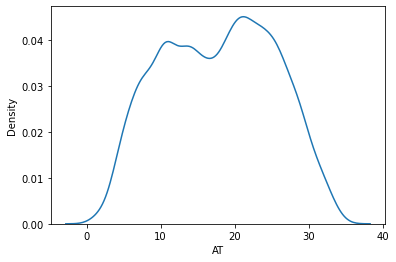

In [10]:
sns.distplot(gasturbine["AT"],hist=False)

<AxesSubplot:xlabel='AP', ylabel='Density'>

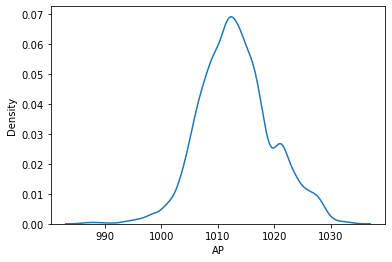

In [11]:
sns.distplot(gasturbine["AP"],hist=False)

<AxesSubplot:xlabel='AH', ylabel='Density'>

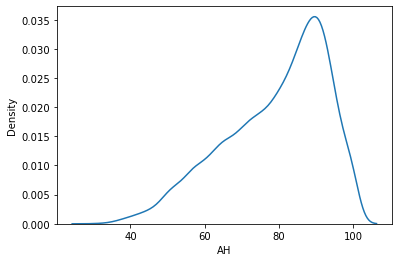

In [13]:
sns.distplot(gasturbine["AH"],hist=False)

<AxesSubplot:xlabel='AFDP', ylabel='Density'>

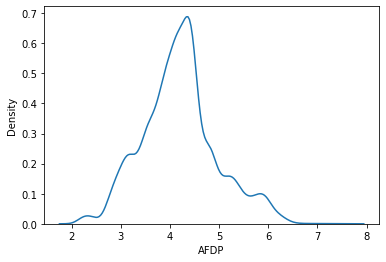

In [14]:
sns.distplot(gasturbine["AFDP"],hist=False)

<AxesSubplot:xlabel='GTEP', ylabel='Density'>

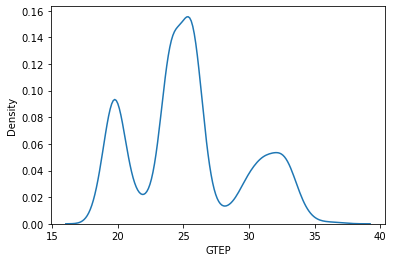

In [15]:
sns.distplot(gasturbine["GTEP"],hist=False)

<AxesSubplot:xlabel='TIT', ylabel='Density'>

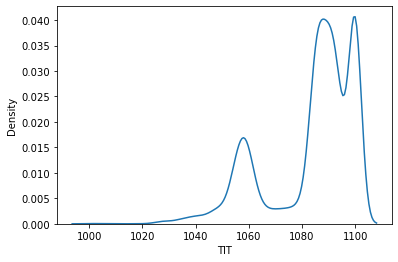

In [16]:
sns.distplot(gasturbine["TIT"],hist=False)

<AxesSubplot:xlabel='TAT', ylabel='Density'>

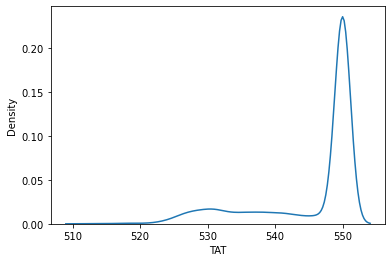

In [17]:
sns.distplot(gasturbine["TAT"],hist=False)

<AxesSubplot:xlabel='TEY', ylabel='Density'>

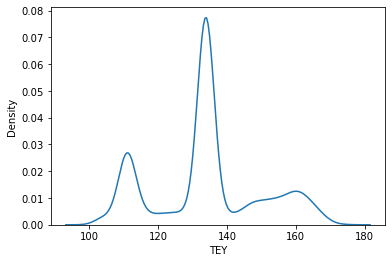

In [18]:
sns.distplot(gasturbine["TEY"],hist=False)

<AxesSubplot:xlabel='CDP', ylabel='Density'>

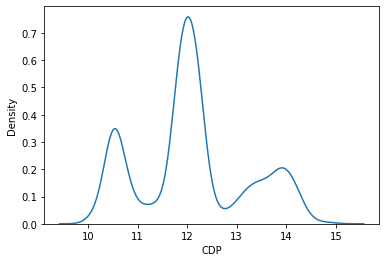

In [19]:
sns.distplot(gasturbine["CDP"],hist=False)

<AxesSubplot:xlabel='CO', ylabel='Density'>

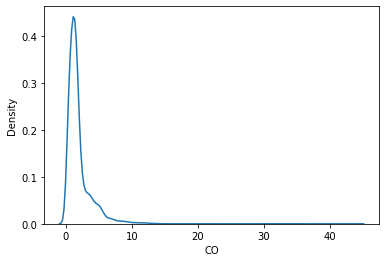

In [20]:
sns.distplot(gasturbine["CO"],hist=False)

<AxesSubplot:xlabel='NOX', ylabel='Density'>

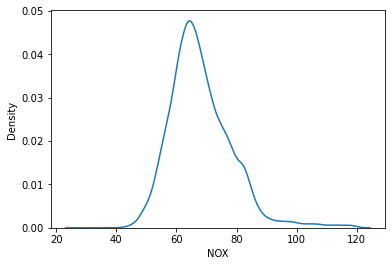

In [21]:
sns.distplot(gasturbine["NOX"],hist=False)

In [22]:
# split into input (X) and output (Y) variables
data=gasturbine.copy()

x=data.drop(columns='TEY',axis=1)

y=data[['TEY']]

In [23]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [24]:
y

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72
...,...
15034,111.61
15035,111.78
15036,110.19
15037,110.74


In [25]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
scaled_x=std.fit_transform(x)
scaled_x

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [26]:
#model Building
seq_model=Sequential()

In [27]:
seq_model.add(Dense(50,input_dim=10, kernel_initializer='normal', activation='relu'))
seq_model.add(Dense(25,activation='relu'))
seq_model.add(Dense(1,activation='relu'))
seq_model.summary()
seq_model.compile(optimizer="adam",loss="mse",metrics=['mse','mae'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                550       
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,851
Trainable params: 1,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
hist_model=seq_model.fit(x,y,validation_split=0.25,epochs=250,batch_size=1000)

Epoch 1/250
12/12 [==============================] - 1s 20ms/step - loss: 18507.7773 - mse: 18507.7773 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 2/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7773 - mse: 18507.7773 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 3/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7773 - mse: 18507.7773 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 4/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7754 - mse: 18507.7754 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 5/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7754 - mse: 18507.7754 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 6/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7754 

12/12 [==============================] - 0s 3ms/step - loss: 18507.7754 - mse: 18507.7754 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 46/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7773 - mse: 18507.7773 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 47/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7793 - mse: 18507.7793 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 48/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7734 - mse: 18507.7734 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 49/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7773 - mse: 18507.7773 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 50/250
12/12 [==============================] - 0s 3ms/step - loss: 18507.7793 - mse: 1

12/12 [==============================] - 0s 3ms/step - loss: 18507.7793 - mse: 18507.7793 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 90/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7773 - mse: 18507.7773 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 91/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7754 - mse: 18507.7754 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 92/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7773 - mse: 18507.7773 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 93/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7773 - mse: 18507.7773 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 94/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7754 - mse: 1

12/12 [==============================] - 0s 4ms/step - loss: 18507.7754 - mse: 18507.7754 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 134/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7793 - mse: 18507.7793 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 135/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7773 - mse: 18507.7773 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 136/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7754 - mse: 18507.7754 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 137/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7773 - mse: 18507.7773 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 138/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7773 - m

12/12 [==============================] - 0s 4ms/step - loss: 18507.7793 - mse: 18507.7793 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 178/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7793 - mse: 18507.7793 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 179/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7754 - mse: 18507.7754 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 180/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7754 - mse: 18507.7754 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 181/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7773 - mse: 18507.7773 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 182/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7754 - m

12/12 [==============================] - 0s 3ms/step - loss: 18507.7773 - mse: 18507.7773 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 222/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7793 - mse: 18507.7793 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 223/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7754 - mse: 18507.7754 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 224/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7793 - mse: 18507.7793 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 225/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7793 - mse: 18507.7793 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 226/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7793 - m

In [29]:
mse=seq_model.evaluate(x,y)

470/470 [==============================] - 1s 1ms/step - loss: 18257.1094 - mse: 18257.1094 - mae: 134.1884


In [30]:
hist_model.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

In [31]:
prd=seq_model.predict(x)
prd_df=pd.DataFrame(prd)
prd_df.head(20)

470/470 [==============================] - 0s 830us/step


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [32]:
y.head(20)

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72
5,114.72
6,114.71
7,114.71
8,114.72
9,131.70
